In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(lubridate)  
library(readr)     
library(forcats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Read Data

In [2]:
library(readr)


#loading the dataset
url <- "https://raw.githubusercontent.com/ashleykchan/kaggle/refs/heads/main/marketing_campaign.csv"
data <- read_delim(url) 

#the dataset
head(data)

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


# Data Cleaning and Wrangling

In [3]:
# Data cleaning and wrangling
clean_data <- data %>%
# Convert date to proper format
mutate(Dt_Customer = dmy(Dt_Customer),
         # Calculate customer age from birth year
         Age = 2025 - Year_Birth,
         # Create total children variable
         Total_Children = Kidhome + Teenhome,
         # Recode education for simplicity
         Education = fct_collapse(Education,
                                 "Postgraduate" = c("PhD", "Master"),
                                 "Undergraduate" = c("Graduation"),
                                 "Basic" = c("2n Cycle", "Basic")),
         # Simplify marital status
         Marital_Status = fct_collapse(Marital_Status,
                                      "Partnered" = c("Married", "Together"),
                                      "Single" = c("Single", "Divorced", "Widow", "Alone", "Absurd", "YOLO"))) %>%
# Remove unnecessary columns
select(-c(ID, Year_Birth, Z_CostContact, Z_Revenue)) %>%
# Remove rows with missing values (only Income has NAs)
drop_na(Income)

In [4]:
# Check for missing values
missing_summary <- sapply(clean_data, function(x) sum(is.na(x)))
print(missing_summary)

          Education      Marital_Status              Income             Kidhome 
                  0                   0                   0                   0 
           Teenhome         Dt_Customer             Recency            MntWines 
                  0                   0                   0                   0 
          MntFruits     MntMeatProducts     MntFishProducts    MntSweetProducts 
                  0                   0                   0                   0 
       MntGoldProds   NumDealsPurchases     NumWebPurchases NumCatalogPurchases 
                  0                   0                   0                   0 
  NumStorePurchases   NumWebVisitsMonth        AcceptedCmp3        AcceptedCmp4 
                  0                   0                   0                   0 
       AcceptedCmp5        AcceptedCmp1        AcceptedCmp2            Complain 
                  0                   0                   0                   0 
           Response         

# Summary Tables

In [5]:
# Summary of key variables
summary(clean_data %>% select(Age, Income, Total_Children, MntWines))

# Count by education and marital status
clean_data %>%
  count(Education, Marital_Status) %>%
  pivot_wider(names_from = Marital_Status, values_from = n, values_fill = 0)

# Average wine spending by demographic groups
clean_data %>%
  group_by(Education, Marital_Status, Total_Children) %>%
  summarise(
    Avg_Wine_Spending = mean(MntWines),
    N = n(),
    .groups = "drop"
  ) %>%
  arrange(desc(Avg_Wine_Spending))

      Age             Income       Total_Children      MntWines     
 Min.   : 29.00   Min.   :  1730   Min.   :0.0000   Min.   :   0.0  
 1st Qu.: 48.00   1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:  24.0  
 Median : 55.00   Median : 51382   Median :1.0000   Median : 174.5  
 Mean   : 56.18   Mean   : 52247   Mean   :0.9472   Mean   : 305.1  
 3rd Qu.: 66.00   3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.: 505.0  
 Max.   :132.00   Max.   :666666   Max.   :3.0000   Max.   :1493.0  

Education,Single,Partnered
<fct>,<int>,<int>
Basic,84,170
Undergraduate,402,714
Postgraduate,300,546


Education,Marital_Status,Total_Children,Avg_Wine_Spending,N
<fct>,<fct>,<dbl>,<dbl>,<int>
Postgraduate,Partnered,0,638.85075,134
Postgraduate,Single,0,612.61616,99
Undergraduate,Partnered,0,460.88947,190
Undergraduate,Single,0,421.14615,130
Basic,Single,0,364.52174,23
Postgraduate,Single,1,346.80000,125
Postgraduate,Partnered,1,334.28975,283
Undergraduate,Partnered,1,262.04570,372
Postgraduate,Partnered,3,258.30769,13


# 
Data Visualization

## Visualization 1: Wine Spending by Age and Income

`geom_smooth()` using formula = 'y ~ x'


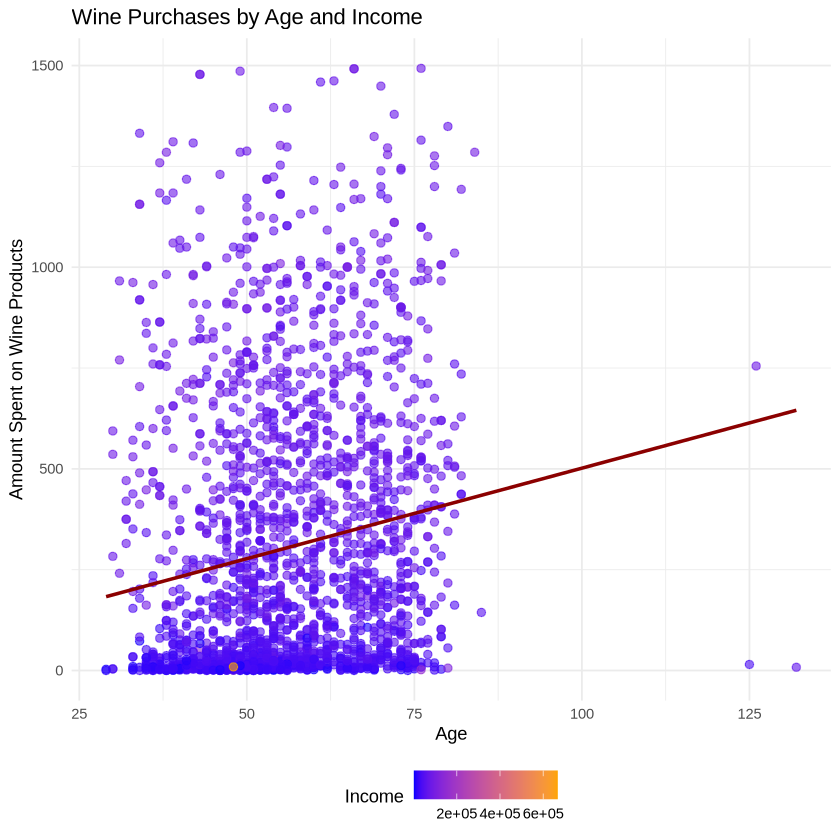

In [6]:
ggplot(clean_data, aes(x = Age, y = MntWines, color = Income)) +
  geom_point(alpha = 0.6, size = 2) +
  geom_smooth(method = "lm", se = FALSE, color = "darkred") +
  scale_color_gradient(low = "blue", high = "orange") +
  labs(title = "Wine Purchases by Age and Income",
       x = "Age", 
       y = "Amount Spent on Wine Products",
       color = "Income") +
  theme_minimal() +
  theme(legend.position = "bottom")

## Visualization 2: Wine Spending by Family Structure and Education

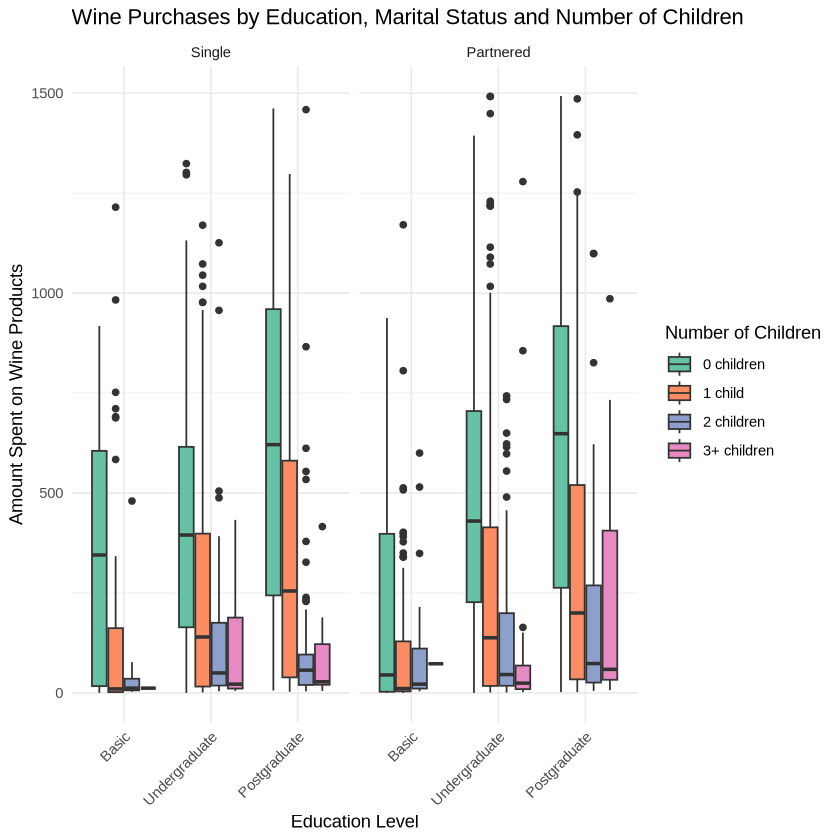

In [7]:

# Create a categorical version of Total_Children
clean_data <- clean_data %>%
  mutate(Children_Cat = case_when(
    Total_Children == 0 ~ "0 children",
    Total_Children == 1 ~ "1 child",
    Total_Children == 2 ~ "2 children",
    TRUE ~ "3+ children"
  ))

ggplot(clean_data, aes(x = Education, y = MntWines, fill = Children_Cat)) +
  geom_boxplot() +
  facet_wrap(~Marital_Status) +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Wine Purchases by Education, Marital Status and Number of Children",
       x = "Education Level", 
       y = "Amount Spent on Wine Products",
       fill = "Number of Children") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Potential Problems and Transformations

### 1. Outliers in Income and Wine Spending:

There are extreme values in both Income and MntWines that might skew our analysis

Solution: Consider log transformation

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


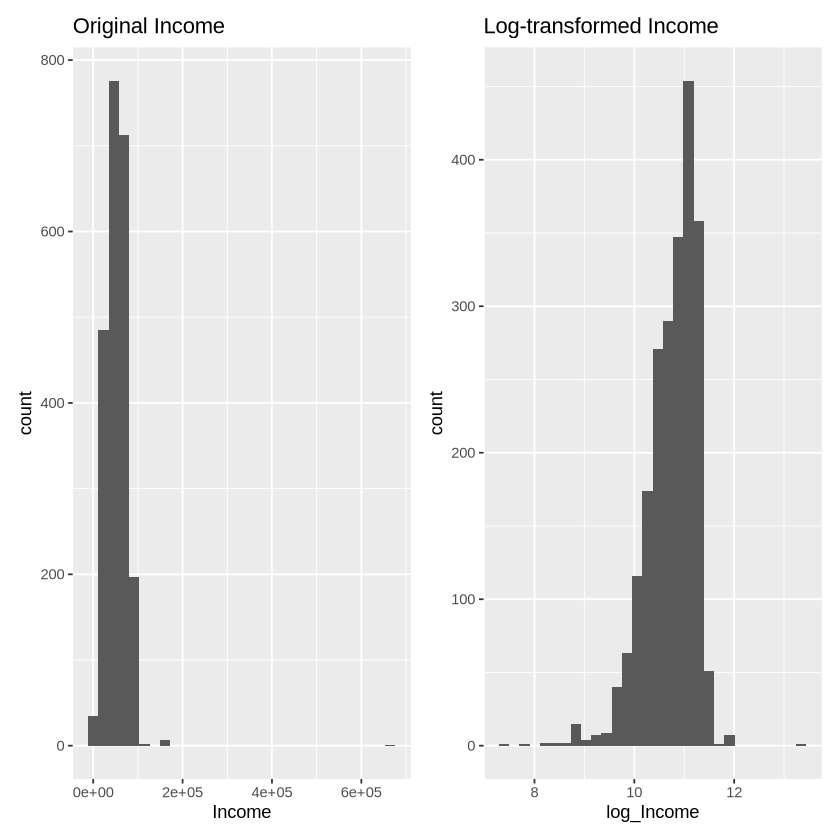

In [8]:
library(patchwork)
# Add log-transformed variables
clean_data <- clean_data %>%
  mutate(log_Income = log(Income + 1),
         log_MntWines = log(MntWines + 1))

# Plot to show effect of transformation
p1 <- ggplot(clean_data, aes(x = Income)) + geom_histogram() + ggtitle("Original Income")
p2 <- ggplot(clean_data, aes(x = log_Income)) + geom_histogram() + ggtitle("Log-transformed Income")
p1 + p2

### 2. Multicollinearity:

Multicollinearity between explanatory variables can make it difficult to isolate the effect of each variable. If predictors are highly correlated, it can affect the model's stability.

Solution: Check VIF (Variance Inflation Factor), which measures how much a predictor variable is explained by other predictors

In [9]:
library(tidyverse)
library(car)  

# Fit a linear model with all the relevant predictors
model <- lm(MntWines ~ Age + Income + Total_Children + Education + Marital_Status + Recency + NumDealsPurchases +
              NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth + AcceptedCmp1 +
              AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response,
            data = clean_data)


# Calculate the VIFs for all predictors
vif_values <- vif(model)

# Convert the VIF output into a tibble 
vif_table <- tibble(
  Predictor = names(vif_values),   
  VIF = vif_values                )

# Print the VIF table
print(vif_table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ purrr   1.0.2     ✔ tibble  3.2.1
✔ stringr 1.5.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode




# A tibble: 17 × 1
   VIF[,"GVIF"] [,"Df"] [,"GVIF^(1/(2*Df))"]
          <dbl>   <dbl>                <dbl>
 1         1.11       1                 1.05
 2         2.09       1                 1.45
 3         1.80       1                 1.34
 4         1.08       2                 1.02
 5         1.04       1                 1.02
 6         1.06       1                 1.03
 7         1.64       1                 1.28
 8         1.72       1                 1.31
 9         2.26       1                 1.50
10         2.00       1                 1.42
11         2.21       1                 1.49
12         1.34       1                 1.16
13         1.15       1                 1.07
14         1.14       1                 1.07
15         1.27       1                 1.13
16         1.50       1                 1.22
17         1.42       1                 1.19


Conclusion: VIF < 5 indicates very little multicollinearity. Our predictors are sufficiently independent of each other.

# Methods

In [10]:
library(tidyverse)
library(caret)
library(MASS)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area


The following object is masked from ‘package:dplyr’:

    select




### Data Splitting

In [11]:
set.seed(123)
train_index <- createDataPartition(clean_data$MntWines, p = 0.8, list = FALSE)
train_data <- clean_data[train_index, ]
test_data <- clean_data[-train_index, ]

### Initial Model Specification

In [12]:
full_model <- lm(log_MntWines ~ Age + Income + Total_Children + Education + 
                 Marital_Status + Recency + NumDealsPurchases + NumWebPurchases + 
                 NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth,
               data = train_data)

### Backward Selection

In [13]:
final_model <- step(full_model, direction = "backward", trace = 0)
summary(final_model)


Call:
lm(formula = log_MntWines ~ Age + Income + Education + NumDealsPurchases + 
    NumWebPurchases + NumCatalogPurchases + NumStorePurchases + 
    NumWebVisitsMonth, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3027 -0.4848  0.0808  0.5432  2.9658 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.586e-01  1.479e-01   3.777 0.000164 ***
Age                     9.844e-03  1.753e-03   5.615 2.28e-08 ***
Income                  1.134e-05  1.082e-06  10.479  < 2e-16 ***
EducationUndergraduate  6.824e-01  6.821e-02  10.004  < 2e-16 ***
EducationPostgraduate   9.673e-01  7.086e-02  13.651  < 2e-16 ***
NumDealsPurchases       3.503e-02  1.233e-02   2.842 0.004538 ** 
NumWebPurchases         2.103e-01  9.667e-03  21.758  < 2e-16 ***
NumCatalogPurchases     1.250e-01  9.502e-03  13.158  < 2e-16 ***
NumStorePurchases       1.908e-01  8.598e-03  22.193  < 2e-16 ***
NumWebVisitsMonth      -2.305e-02  1.247e

### Model Overview

The linear regression model explains 77.28% of the variance in log-transformed wine spending (Multiple R-squared = 0.7728), indicating strong predictive power. The extremely significant F-statistic (p < 2.2e-16) confirms the overall model validity.

### Significant Predictors and Their Interpretation

1. Income:

For every $1,000 increase in income, wine spending increases by approximately 1.13% (exp(0.00001134*1000) ≈ 1.0113).

Wealthier customers purchase significantly more wine, confirming wine as a luxury good.

2. Age:

Each additional year of age associates with a 0.98% increase in wine spending.

Older customers purchase more wine.

3. Education:

Undergraduate: +68.2% (β = 0.682, p < 0.001)

Postgraduate: +96.7% (β = 0.967, p < 0.001)

Higher education correlates strongly with wine consumption.

4. Purchasing Channels:

Web Purchases: +21.0% per purchase (β = 0.210, p < 0.001)

Catalog Purchases: +12.5% per purchase (β = 0.125, p < 0.001)

Store Purchases: +19.1% per purchase (β = 0.191, p < 0.001)

Customers using multiple channels buy more wine.

5. Deal Purchases:

Each deal purchase associates with 3.5% higher wine spending.

6. Monthly Web Visits:

This effect is statistically significant at the 10% level (p < 0.10)

Each additional monthly website visit is associated with a ~2.3% decrease in wine spending (log-scale), holding other variables constant.

## Model Performance

In [14]:
final_model <- lm(
  formula = log_MntWines ~ Age + Income + Education + NumDealsPurchases + 
    NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth,
  data = train_data)

In [15]:
test_predictions <- predict(final_model, newdata = test_data)

### Mean Absolute Error (MAE)

In [16]:
mae <- mean(abs(test_predictions - test_data$log_MntWines))
print(paste("MAE:", mae))

[1] "MAE: 0.641937784776372"


### Root Mean Squared Error (RMSE)

In [17]:
rmse <- sqrt(mean((test_predictions - test_data$log_MntWines)^2))
print(paste("RMSE:", rmse))

[1] "RMSE: 0.829085277798945"


### R-squared (R²) on Test Data

In [18]:
test_r_squared <- cor(test_predictions, test_data$log_MntWines)^2
print(paste("Test R-squared:", test_r_squared))

[1] "Test R-squared: 0.795028814751731"


### Residual Analysis

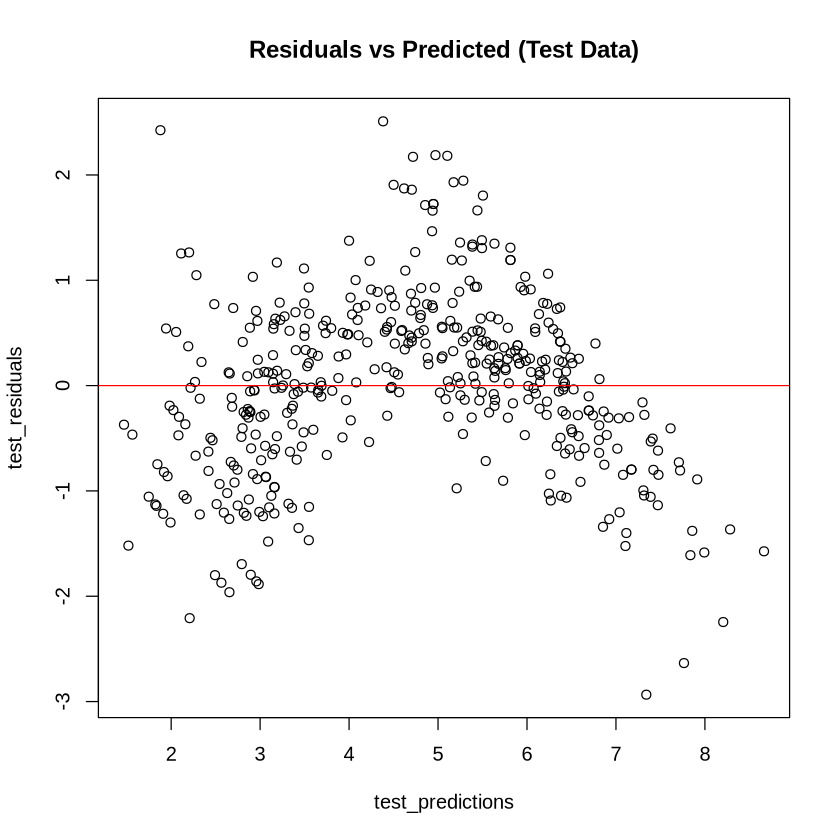

In [19]:
test_residuals <- test_data$log_MntWines - test_predictions
plot(test_predictions, test_residuals, main = "Residuals vs Predicted (Test Data)")
abline(h = 0, col = "red")

### Visualization: Actual vs Predicted Wine Spending

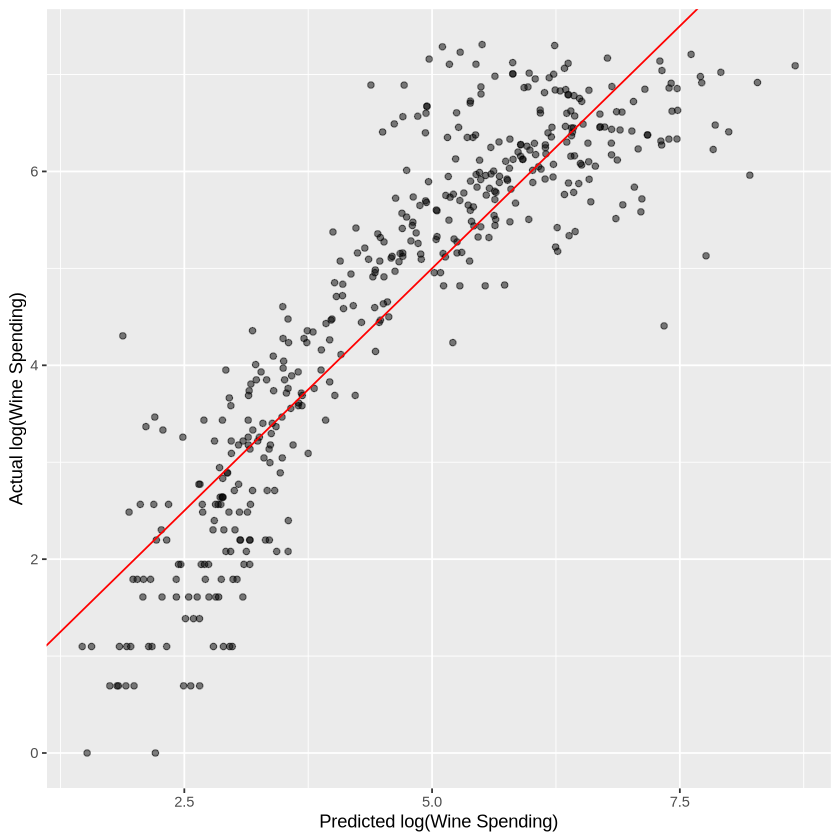

In [20]:
ggplot(test_data, aes(x = predict(final_model, test_data), y = log_MntWines)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(x = "Predicted log(Wine Spending)", y = "Actual log(Wine Spending)")
